In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def arr_to_value(arr):
    return [float(elem) for elem in arr];

In [218]:
init_data = open('ex1data1.txt', 'r');
read_data = init_data.read();
arr = read_data.split('\n');
arr.pop();

X = [];
Y = [];

for line in arr:
    X.append([float(line.split(',')[0])]);
    Y.append([float(line.split(',')[1])]);
    
m = len(X);
n = 1;


X_total = [[1] + x for x in X];
X_total = np.array(X_total);
X = np.array(X);
Y = np.array(Y);

# NORMALIZATION

In [219]:
# theta normalized by normal equation

def mormalize_theta(x, y):
    theta_normalized_arrayed = np.dot(
        np.dot(
            np.linalg.inv(
                np.dot(x.transpose(), x)), x.transpose()
        ), y);
    
    return arr_to_value(theta_normalized_arrayed);

theta_normalized = mormalize_theta(
    x=X_total,
    y=Y,
);

theta_normalized

[-3.89578087831186, 1.1930336441895941]

In [220]:
# hypothesis calculation
def hypothesis(args, theta):
    length = len(theta);
    out = np.zeros([len(args), 2]);
    out2 = np.zeros([len(args), 1]);
    
    if length != len(args[0]):
        return 'false';
    
    for i in range(len(args)):
        for j in range(len(args[i])):
            out[i][j] = args[i][j] * theta[j];
    
    for i in range(len(out)):
        out2[i] = sum(out[i]);
    
    return out2;

hypo = hypothesis(X_total, theta_normalized);

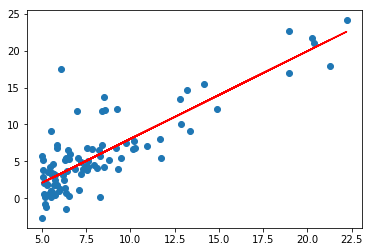

In [221]:
plt.plot(X, Y, 'o', X, hypo, 'r');
plt.show();

In [222]:
def hypo_predict(value):
    return theta_normalized[0] + theta_normalized[1] * value;

hypo_predict(101)

116.60061718483715

# Gradient Descent

In [223]:
theta = np.ones(n + 1);
iterations = 1500;
alpha = 0.01;

def gradient_descent(x, y, theta, alpha, m, iterations):
    x_transposed = x.transpose();
    
    for i in range(iterations):
        gradient = np.ones(n + 1);
        
        hypothesis = np.dot(x, theta);
        loss = hypothesis - arr_to_value(y);
        
        cost_function = np.sum(loss ** 2) / (2 * m);
        # print("Iteration %d | Cost: %f" % (i, cost_function));

        # average gradient per example ???
        gradient = np.dot(x_transposed, loss) / m;
        
        # another implementation
#         gradient[0] = sum([(theta[0] + theta[1] * x[j][1] - y[j]) * x[j][0] for j in range(len(x))]) / m;
#         gradient[1] = sum([(theta[0] + theta[1] * x[j][1] - y[j]) * x[j][1] for j in range(len(x))]) / m;
        
        theta = theta - alpha * gradient;

    return theta;

theta_gradient = gradient_descent(
    x=X_total,
    y=Y,
    theta=theta,
    alpha=alpha,
    m=m,
    iterations=iterations,
);
theta_gradient

array([-3.57081935,  1.16038773])

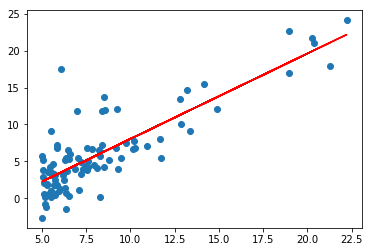

In [224]:
hypo_gradient = hypothesis(X_total, theta_gradient)
plt.plot(X, Y, 'o', X, hypothesis(X_total, theta_gradient), 'r');
plt.show();